In [6]:
# Garch Model

In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


#Apple Volatility 
start = datetime(2021, 1, 1)
end = datetime(2024, 10, 18)

aapl = yf.download('AAPL', start= start, end=end)
returns = 100* aapl.Close.pct_change().dropna()

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize = 16)
plt.title('AAPL Returns', fontsize = 20)
pip3



ModuleNotFoundError: No module named 'arch'

In [10]:
plot_pacf(returns**2)
plt.show()

NameError: name 'plot_pacf' is not defined

In [4]:
model = arch_model(returns, p=3,q=3)
model_fit = model.fit()

NameError: name 'arch_model' is not defined

In [1]:
model_fit.summary()

NameError: name 'model_fit' is not defined

In [6]:
#Garch(3,0) = ARCH(3)
model = arch_model(returns, p=3, q=0)
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 4090.091499904913
Iteration:      2,   Func. Count:     16,   Neg. LLF: 4115.727767569302
Iteration:      3,   Func. Count:     25,   Neg. LLF: 4138.166283326199
Iteration:      4,   Func. Count:     32,   Neg. LLF: 2017.0571099186843
Iteration:      5,   Func. Count:     39,   Neg. LLF: 2044.178666623703
Iteration:      6,   Func. Count:     47,   Neg. LLF: 2376.1787949136005
Iteration:      7,   Func. Count:     54,   Neg. LLF: 1901.4994356763425
Iteration:      8,   Func. Count:     62,   Neg. LLF: 1841.085707056651
Iteration:      9,   Func. Count:     69,   Neg. LLF: 1840.789220836722
Iteration:     10,   Func. Count:     75,   Neg. LLF: 1840.7866662923416
Iteration:     11,   Func. Count:     81,   Neg. LLF: 1840.7866430408299
Iteration:     12,   Func. Count:     87,   Neg. LLF: 1840.7866422822644
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1840.7866422822644
            Iteration

In [7]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1840.79
Distribution:                  Normal   AIC:                           3691.57
Method:            Maximum Likelihood   BIC:                           3715.87
                                        No. Observations:                  953
Date:                Mon, Oct 21 2024   Df Residuals:                      952
Time:                        23:08:35   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1191  5.750e-02      2.071  3.838e-02 [6.370e-03,  0.232]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          2.0396      0.233      8.757  2.010e-18    [  1.583,  2.496]
alpha[1]       0.2141  7.821e-02      2.737  6.200e-03  [6.077e-02,  0.367]
alpha[2]       0.0513  4.716e-02      1.088      0.276 [-4.111e-02,  0.144]
alpha[3]       0.0509  4.081e-02      1.246      0.213 [-2.913e-02,  0.131]
===========================================================================

Covariance estimator: robust
"""

In [8]:
#Not sure if this is significant enough, therefore the model might not be the best predictor

In [11]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp = 'off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

NameError: name 'returns' is not defined

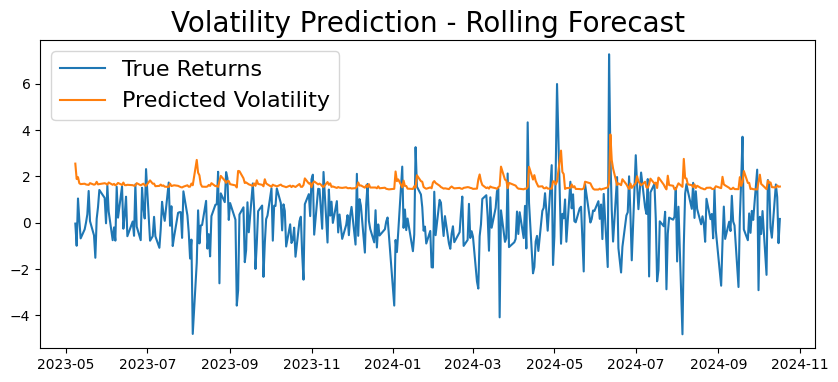

In [10]:
plt.figure(figsize = (10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize = 20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize = 16)

In [11]:
#GARCH Model
train = returns 
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')
pred = model_fit.forecast(horizon=7)
fututre_dates = [returns.index[-1]+ timedelta(days=i)for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=fututre_dates)

In [12]:
plt.figure(figsize = (10,4))
plt.plot(pred)
plt.title("Volatility Prediction - Next 7 Days", fontsize=20)

NameError: name 'pred' is not defined

<Figure size 1000x400 with 0 Axes>

Predicting Stocks with Machine Learning

In [4]:
import yfinance as yf 
import pandas as pd 
import matplotlib as plt

In [8]:

start = datetime(2021, 1, 1)
end = datetime(2024, 10, 25)
sp500 = yf.download('^GSPC', start= start, end=end)

sp500

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2021-01-04 00:00:00+00:00,3700.649902,3700.649902,3769.989990,3662.709961,3764.610107,5015000000
2021-01-05 00:00:00+00:00,3726.860107,3726.860107,3737.830078,3695.070068,3698.020020,4591020000
2021-01-06 00:00:00+00:00,3748.139893,3748.139893,3783.040039,3705.340088,3712.199951,6064110000
2021-01-07 00:00:00+00:00,3803.790039,3803.790039,3811.550049,3764.709961,3764.709961,5099160000
2021-01-08 00:00:00+00:00,3824.679932,3824.679932,3826.689941,3783.600098,3815.050049,4773040000
...,...,...,...,...,...,...
2024-10-18 00:00:00+00:00,5864.669922,5864.669922,5872.169922,5846.109863,5859.430176,3374490000
2024-10-21 00:00:00+00:00,5853.979980,5853.979980,5866.919922,5824.790039,5857.819824,3407010000


<Axes: xlabel='Date'>

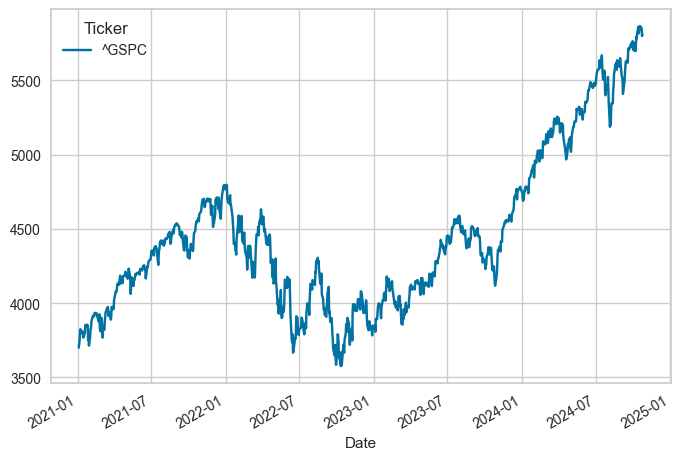

In [9]:
sp500.plot.line(y='Close', use_index=True)

Forecast Using Pycaret

In [10]:
import pandas as pd
from pycaret.regression import *
from pycaret.regression import setup


In [16]:


sp500['Year'] = sp500.index.year
sp500['Month'] = sp500.index.month
sp500['Day'] = sp500.index.day
sp500['DayofWeek'] = sp500.index.dayofweek


sp500.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 
                 'Year', 'Month', 'Day', 'DayofWeek', 'NextClose']

sp500['NextClose'] = sp500['Close'].shift(-1)
sp500.dropna(subset=['NextClose'], inplace=True)



sp500
# Check if the columns look correct






,Adj Close,Close,High,Low,Open,Volume,Year,Month,Day,DayofWeek,NextClose
Date,,,,,,,,,,,
2021-01-04 00:00:00+00:00,3700.649902,3700.649902,3769.989990,3662.709961,3764.610107,5015000000,2021,1,4,0,3726.860107
2021-01-05 00:00:00+00:00,3726.860107,3726.860107,3737.830078,3695.070068,3698.020020,4591020000,2021,1,5,1,3748.139893
2021-01-06 00:00:00+00:00,3748.139893,3748.139893,3783.040039,3705.340088,3712.199951,6064110000,2021,1,6,2,3803.790039
2021-01-07 00:00:00+00:00,3803.790039,3803.790039,3811.550049,3764.709961,3764.709961,5099160000,2021,1,7,3,3824.679932
2021-01-08 00:00:00+00:00,3824.679932,3824.679932,3826.689941,3783.600098,3815.050049,4773040000,2021,1,8,4,3799.610107
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-17 00:00:00+00:00,5841.470215,5841.470215,5878.459961,5840.250000,5875.620117,3480010000,2024,10,17,3,5864.669922
2024-10-18 00:00:00+00:00,5864.669922,5864.669922,5872.169922,5846.109863,5859.430176,3374490000,2024,10,18,4,5853.979980
2024-10-21 00:00:00+00:00,5853.979980,5853.979980,5866.919922,5824.790039,5857.819824,3407010000,2024,10,21,0,5851.200195


In [17]:
train = sp500[sp500.index < '2022-01-01']
test = sp500[sp500.index >= "2022-01-01"]

reg = setup(data = train, target = 'NextClose', session_id= 123, use_gpu = True)


  File "/Users/kamilah/myenv/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 270, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "/usr/local/Cellar/python@3.11/3.11.10/Frameworks/Python.framework/Versions/3.11/lib/python3.11/subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/Cellar/python@3.11/3.11.10/Frameworks/Python.framework/Versions/3.11/lib/python3.11/subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/usr/local/Cellar/python@3.11/3.11.10/Frameworks/Python.framework/Versions/3.11/lib/python3.11/subprocess.py", line 1955, in _execute_child
    raise child_exception_type(errno_num, err_msg, err_filename)
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not e

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


,Description,Value
0,Session id,123
1,Target,NextClose
2,Target type,Regression
3,Original data shape,"(252, 11)"
4,Transformed data shape,"(252, 11)"
5,Transformed train set shape,"(176, 11)"
6,Transformed test set shape,"(76, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


In [18]:
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,25.9715,1168.9601,33.7671,0.9845,0.0080,0.0061,0.0180
lar,Least Angle Regression,26.1412,1167.5176,33.7212,0.9845,0.0080,0.0062,0.0170
lr,Linear Regression,26.1002,1172.0931,33.8411,0.9844,0.0081,0.0062,0.0200
ridge,Ridge Regression,26.0865,1171.6159,33.8317,0.9844,0.0081,0.0062,0.0230
en,Elastic Net,26.0837,1185.3301,33.9235,0.9843,0.0081,0.0062,0.0160
llar,Lasso Least Angle Regression,26.0223,1182.1239,33.8912,0.9843,0.0081,0.0061,0.0160
br,Bayesian Ridge,26.6751,1243.7556,34.7058,0.9835,0.0083,0.0063,0.0160
et,Extra Trees Regressor,28.9434,1436.8908,37.2657,0.9814,0.0089,0.0069,0.1240
rf,Random Forest Regressor,29.3945,1472.2096,37.7349,0.9808,0.0090,0.0070,0.1430
gbr,Gradient Boosting Regressor,30.2616,1543.0618,38.6684,0.9802,0.0092,0.0072,0.0880


In [19]:
best_model


Lasso(random_state=123)

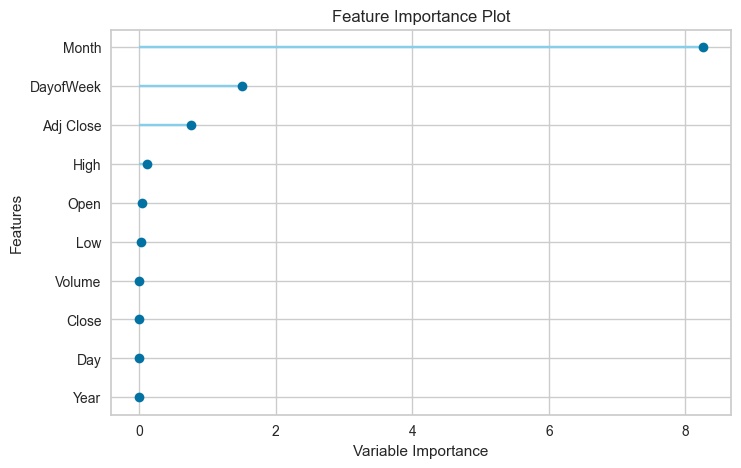

In [20]:
finalized_model = finalize_model(best_model)
plot_model(finalized_model, plot= 'feature')


In [21]:
predictions = predict_model(finalized_model, data = test)

predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,71.8986,8145.1573,90.2505,0.9760,0.0193,0.0155


,Adj Close,Close,High,Low,Open,Volume,Year,Month,Day,DayofWeek,NextClose,prediction_label
Date,,,,,,,,,,,,
2022-01-03 00:00:00+00:00,4796.560059,4796.560059,4796.640137,4758.169922,4778.140137,3831020000,2022,1,3,0,4793.540039,4693.481720
2022-01-04 00:00:00+00:00,4793.540039,4793.540039,4818.620117,4774.270020,4804.509766,4683170000,2022,1,4,1,4700.580078,4690.447104
2022-01-05 00:00:00+00:00,4700.580078,4700.580078,4797.700195,4699.439941,4787.990234,4887960000,2022,1,5,2,4696.049805,4618.805198
2022-01-06 00:00:00+00:00,4696.049805,4696.049805,4725.009766,4671.259766,4693.390137,4295280000,2022,1,6,3,4677.029785,4609.513588
2022-01-07 00:00:00+00:00,4677.029785,4677.029785,4707.950195,4662.740234,4697.660156,4181510000,2022,1,7,4,4670.290039,4595.792361
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-17 00:00:00+00:00,5841.470215,5841.470215,5878.459961,5840.250000,5875.620117,3480010000,2024,10,17,3,5864.669922,5705.532866
2024-10-18 00:00:00+00:00,5864.669922,5864.669922,5872.169922,5846.109863,5859.430176,3374490000,2024,10,18,4,5853.979980,5723.869636
2024-10-21 00:00:00+00:00,5853.979980,5853.979980,5866.919922,5824.790039,5857.819824,3407010000,2024,10,21,0,5851.200195,5709.366177


In [22]:
predictions = predict_model(finalized_model, data= sp500)
# Get specific columns after making predictions
print(predictions[['Year', 'Month', 'Day', 'NextClose', 'prediction_label']])



,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,59.6458,6290.0732,79.3100,0.9778,0.0170,0.0130


                           Year  Month  Day    NextClose  prediction_label
Date                                                                      
2021-01-04 00:00:00+00:00  2021      1    4  3726.860107       3725.993709
2021-01-05 00:00:00+00:00  2021      1    5  3748.139893       3743.127852
2021-01-06 00:00:00+00:00  2021      1    6  3803.790039       3756.861859
2021-01-07 00:00:00+00:00  2021      1    7  3824.679932       3810.541960
2021-01-08 00:00:00+00:00  2021      1    8  3799.610107       3833.216019
...                         ...    ...  ...          ...               ...
2024-10-17 00:00:00+00:00  2024     10   17  5864.669922       5705.532866
2024-10-18 00:00:00+00:00  2024     10   18  5853.979980       5723.869636
2024-10-21 00:00:00+00:00  2024     10   21  5851.200195       5709.366177
2024-10-22 00:00:00+00:00  2024     10   22  5797.419922       5707.812013
2024-10-23 00:00:00+00:00  2024     10   23  5809.859863       5665.635130

[958 rows x 5 columns]


In [31]:

from datetime import timedelta


last_date = sp500.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), end=last_date + pd.Timedelta(days=5), freq='B')
future_data = pd.DataFrame(index=future_dates)
future_data['Year'] = future_data.index.year
future_data['Month'] = future_data.index.month
future_data['Day'] = future_data.index.day
future_data['DayofWeek'] = future_data.index.dayofweek

#required_columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
#for col in required_columns:
 #   future_data[col] = 0 

# Predict NextClose for the following week
future_predictions = predict_model(finalized_model, data=future_data)

# Last known close price
last_known_close = sp500['Close'].iloc[-1]

# Evaluate buy/sell signals based on predictions
future_predictions['Action'] = np.where(future_predictions['prediction_label'] > last_known_close, 'Buy', 'Sell')
print(future_data.head())
# Display the predictions with actions
print(future_predictions[['Year', 'Month', 'Day', 'prediction_label', 'Action']])

KeyError: "['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'] not in index"